In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
train=pd.read_csv(r"C:\Users\kirut\Downloads\train_ctrUa4K.csv")
test=pd.read_csv(r"C:\Users\kirut\Downloads\test_lAUu6dG.csv")

In [3]:
data=pd.concat([train,test])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


C:\Users\kirut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kirut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


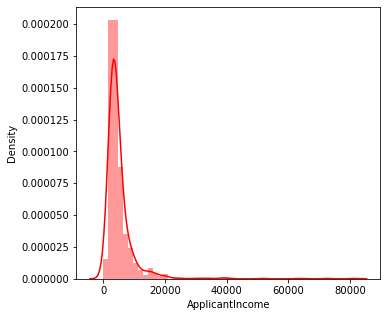

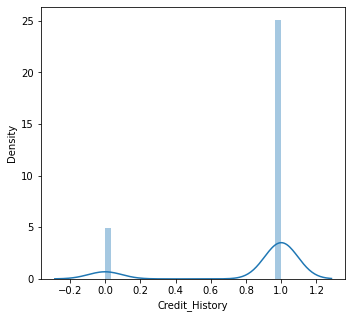

In [4]:
#Univariate Analysis
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],color='r')
plt.figure(figsize=(12,5))
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

C:\Users\kirut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kirut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kirut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

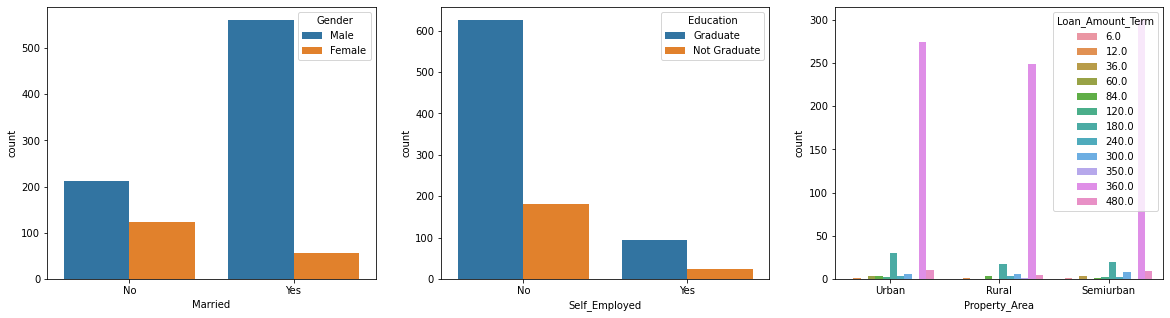

In [5]:
#Bivariate Analysis
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'],hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'],hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'],hue=data['Loan_Amount_Term'])

C:\Users\kirut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kirut\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kirut\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

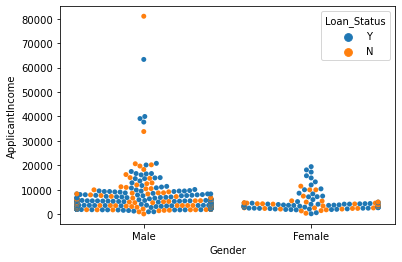

In [6]:
#Multivariate Analysis
sns.swarmplot(data['Gender'],data['ApplicantIncome'],hue=data['Loan_Status'])

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [9]:
data.drop(["Loan_ID",'Dependents'],axis=1,inplace=True)

In [10]:
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,Male,Yes,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,Male,No,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,Male,Yes,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [11]:
for i in [data]:
    i["Gender"]=i["Gender"].fillna(data.Gender.dropna().mode()[0])
    i["Married"] = i["Married"].fillna(data.Married.dropna().mode()[0])
    #i["Dependents"]=i["Dependents"].fillna(data.Dependents.dropna().mode()[0]) 
    i["Self_Employed"]=i["Self_Employed"]. fillna(data.Self_Employed.dropna().mode()[0])
    i["Credit_History"]=i["Credit_History"].fillna(data.Credit_History.dropna().mode()[0])
    i["LoanAmount"]=i["LoanAmount"].fillna(data.LoanAmount.dropna().mean())
    i["Loan_Amount_Term"]=i["Loan_Amount_Term"].fillna(data.Loan_Amount_Term.dropna().mean())
    i["Credit_History"]=i["Credit_History"].fillna(data.Credit_History.dropna().mean())
    i["Loan_Status"]=i["Loan_Status"].fillna(data.Loan_Status.dropna().mode()[0])

In [12]:

from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data["Gender"]= label_encoder.fit_transform(data["Gender"])
data["Married"]= label_encoder.fit_transform(data["Married"])
data["Education"]= label_encoder.fit_transform(data["Education"])
data["Self_Employed"]= label_encoder.fit_transform(data["Self_Employed"])
data["Credit_History"]= label_encoder.fit_transform(data["Credit_History"])
data["Property_Area"]= label_encoder.fit_transform(data["Property_Area"])
data["Loan_Status"]= label_encoder.fit_transform(data["Loan_Status"])

In [13]:
data.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
data.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.327012,0.040649,0.024719,0.060444,0.082428,0.096499,-0.069625,0.018627,-0.020801,0.009116
Married,0.327012,1.000000,0.026211,0.013666,0.052126,0.061606,0.156737,-0.048174,0.021738,0.006372,0.059570
Education,0.040649,0.026211,1.000000,-0.010848,-0.138909,-0.060380,-0.162215,-0.024001,-0.062416,-0.050685,-0.057680
Self_Employed,0.024719,0.013666,-0.010848,1.000000,0.113106,-0.018861,0.106942,-0.031107,0.034485,-0.059678,-0.021323
ApplicantIncome,0.060444,0.052126,-0.138909,0.113106,1.000000,-0.114247,0.547188,-0.023051,0.020201,0.005513,-0.023077
CoapplicantIncome,0.082428,0.061606,-0.060380,-0.018861,-0.114247,1.000000,0.178449,-0.043705,-0.011531,-0.024921,-0.050084
LoanAmount,0.096499,0.156737,-0.162215,0.106942,0.547188,0.178449,1.000000,0.054827,-0.003577,-0.035653,-0.053077
Loan_Amount_Term,-0.069625,-0.048174,-0.024001,-0.031107,-0.023051,-0.043705,0.054827,1.000000,-0.018377,-0.042209,-0.013822
Credit_History,0.018627,0.021738,-0.062416,0.034485,0.020201,-0.011531,-0.003577,-0.018377,1.000000,0.024342,0.380696
Property_Area,-0.020801,0.006372,-0.050685,-0.059678,0.005513,-0.024921,-0.035653,-0.042209,0.024342,1.000000,0.032649


Text(5.960000000000001, 0.5, 'Count')

<Figure size 720x432 with 0 Axes>

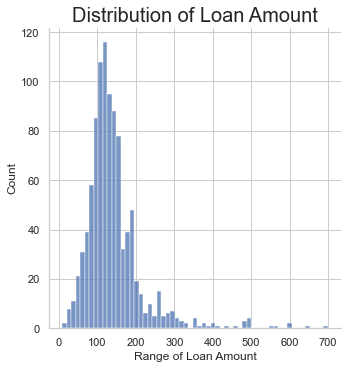

In [15]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.displot(data['LoanAmount'])
plt.title('Distribution of Loan Amount', fontsize = 20)
plt.xlabel('Range of Loan Amount')
plt.ylabel('Count')

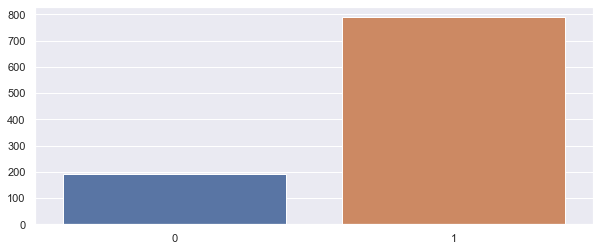

In [16]:
Loanstatus= data.Loan_Status.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Loanstatus.index, y=Loanstatus.values)
plt.show()

In [22]:
df1=data.iloc[:,0:13]
X=df1[["Credit_History","Loan_Status"]]
X

,Credit_History,Loan_Status
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
362,1,1
363,1,1
364,1,1
365,1,1


In [23]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [33]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Users\kirut\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kirut\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kirut\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kirut\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

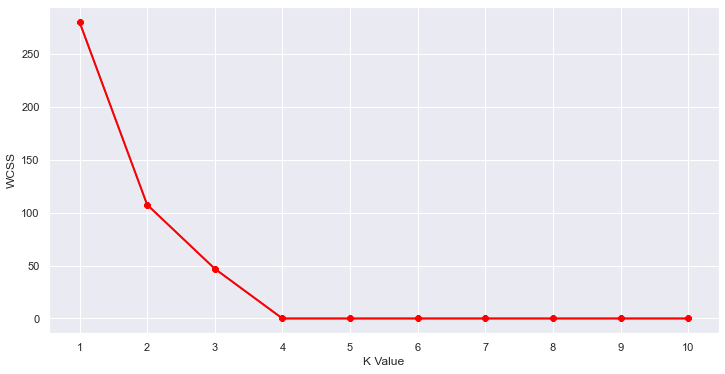

In [34]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [35]:
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

C:\Users\kirut\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,label
0,1,0,0,0,5849,0.0,142.51153,360.0,1,2,1,1
1,1,1,0,0,4583,1508.0,128.00000,360.0,1,0,0,0
2,1,1,0,1,3000,0.0,66.00000,360.0,1,2,1,1
3,1,1,1,0,2583,2358.0,120.00000,360.0,1,2,1,1
4,1,0,0,0,6000,0.0,141.00000,360.0,1,2,1,1


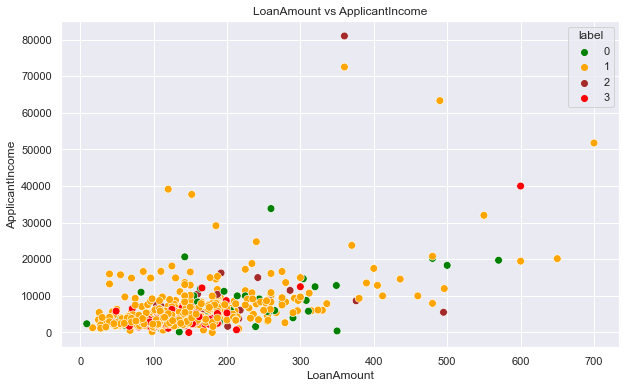

In [36]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = "LoanAmount",y = "ApplicantIncome",hue="label",  
                 palette=['green','orange','brown','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel("LoanAmount")
plt.ylabel("ApplicantIncome") 
plt.title("LoanAmount vs ApplicantIncome")
plt.show()